### Regression models

A **model** for an output feature **y** using input feature(s) $ \mathbf f(X) $ is a function  that predicts an expected value of ***y*** for a given value of ***X*** as $ \mathbf{\hat{y}\:=\:f(X)} $. So $ \mathbf{\hat{y}} $ is the predicted value for the output feature  for a given value of the input feature $ \mathbf{X} $. Specifically, a regression model is a model that uses numeric output features. Visually, a **regression model** for data graphed on a scatter plot traces out a line or a nonlinear curve.

If two features have a strong relationship, predicted values should be close to the observed values. Closeness can be seen visually by comparing points to the graph of the model. Closeness can be measured numerically using residuals. The **residual** of an instance $ \mathbf{(x_i,y_i)} $ is the difference between the observed and predicted value $ \mathbf{(y_i\:-\:\hat{y})} $. A well-fitting model should have small residuals on average.

A model is also used to make predictions about values aside from what was observed. Predictions should only be made for values close to the range of the original data. An **extrapolation** is a prediction for a value far beyond the range of the original data and is often misleading or inaccurate.

### Simple linear regression ###

The simplest regression model for a pair of numeric features $ \mathbf{(x,y)} $ is to consider a model that predicts the output feature $ \mathbf{y} $ for a given input feature $ \mathbf{x} $ using a line graphed in the scatter plot. A simple linear regression is a mathematical model of the form $ \mathbf{\hat{y}\:=\:b_0\:+\:b_1x} $, where:

$ \mathbf{x} $ is the input feature.<br>
$ \mathbf{\hat{y}} $ is the predicted value of the output feature $ \mathbf{y} $ for a given value of $ \mathbf{y} $.<br>
$ \mathbf{b_0} $ is the $ \mathbf{y} $ -intercept, representing the predicted value of $ \mathbf{y} $ when $ \mathbf{x\:=\:0} $.<br>
$ \mathbf{b_1} $ is the slope, representing how much the predicted value of $ \mathbf{y} $ changes for a one-unit change in the value of $ \mathbf{x} $ .


### The least-squares regression line ###

The values of $ \mathbf{b_0} $ and $ \mathbf{b_1} $ should be chosen so that the predictions $ \mathbf{\hat{y}_i} $ are as close as possible, on average, to the observed values $ \mathbf{y}_i $. A common method to compute regression coefficients is to minimize some mathematical combination of the residuals $ \mathbf{(y_i\:-\:\hat{y}_i}) $ . The sum of squared errors (**SSE**) is the sum of the squares of all residuals and can be found by the formula $ \mathbf{\sum{(y_i\ -\ \hat{y}_i)^2}} $. A **least-squares regression line** is a simple linear regression $ \mathbf{\hat{y}\:=\:b_0\:+\:b_1x} $ that minimizes the sum of squared errors.

How well the simple linear regression line models the data can be measured by how much closer the predictions from the regression line are to the observed values compared to predictions from a model that assumes no relationship exists between $ \mathit{x} $ and $ \mathit{x} $ . Such a "no-relationship" model would be a horizontal line model $ \mathbf{\hat{y}\ = \bar{y}} $ that returns the mean $ \mathit{\bar{y}} $ for every value of $ \mathit{x} $. The proportion of variation explained by a simple linear regression is given by the equation
$$ \mathbf{\frac{SSE(\bar{y})\ -\ SSE(regression\ line)}{SSE(\bar{y})}} $$


### The correlation coefficient $ \mathit{r} $ and least-squares regression   ###

Above, the least-squares regression was given, but was using a simple linear model appropriate in the first place? If so, how were the coefficients computed? The answer to both questions involve the scatter plot and the data's summary statistics. A simple linear regression should only be used as a model when the scatter plot of  displays a strong linear form. The linearity must be visually confirmed, but the strength can be checked numerically.

The correlation coefficient  measures the direction and strength of a linear relationship as a unitless value between -1 and 1, and can be computed by the formula

$$ r\ =\ \frac{\sum{(x_i\ -\ \bar{x})(y_i\ -\ \bar{y})}}{\sqrt{\sum{(x_i\ -\ \bar{x})^2}\ \cdot\ \sum{(y_i\ -\ \bar{y})^2}}}\ =\ \frac{1}{n\ -\ 1}\sum{\bigg(\frac{x_i\ -\ \bar{x}}{s_x}\bigg)\bigg(\frac{y_i\ -\ \bar{y}}{s_y}\bigg)} $$

where $ \mathit{\bar{x}} $ and $ \mathit{\bar{y}} $ are the sample means, $ \mathit{s_x} $  and $ \mathit{s_y} $  are the sample standard deviations, $ \mathit{n} $  is the sample size, and $ \mathit{(x_i,y_i)} $  are the observed values.

A large positive $ \mathit{r} $  value indicates a positive linear association, and a large negative $ \mathit{r} $  value indicates a negative linear association.

If a simple linear regression is appropriate, the slope  and intercept  of the least-squares regression can be computed from the correlation coefficient as

$$ \mathbf{b_1\ =\ r\frac{s_y}{s_x}}\ \ and\ \ \mathbf{b_0\ =\ \bar{y}\ -\ b_1\cdot\bar{x}} $$

Furthermore, the proportion of variation explained by the least-squares regression is equal to  $ \mathit{r^2} $.

In [2]:
# Import packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import r_regression

[crab-groups.csv](https://drive.google.com/file/d/1_xIYHD6jASWs42Fkr3fEmMPuojH_dSp3/view?usp=sharing)

In [3]:
# Import data
crabs = pd.read_csv('data/crab-groups.csv')
crabs.describe()

,latitude,n,mean_mm,min_mm,max_mm,sd_mm,median_mm
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,37.615385,30.153846,14.665385,9.743846,19.115385,2.457692,14.703846
std,4.451750,3.236411,2.465545,1.841533,3.043257,0.778440,2.592012
min,30.000000,25.000000,9.850000,6.640000,13.600000,1.790000,9.550000
25%,34.000000,28.000000,12.500000,8.520000,17.300000,2.050000,12.600000
50%,39.100000,30.000000,15.300000,9.580000,19.800000,2.300000,15.400000
75%,41.600000,30.000000,16.300000,11.000000,21.400000,2.420000,16.700000
max,42.700000,37.000000,18.500000,13.200000,23.400000,4.810000,18.400000


In [4]:
crabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   site       13 non-null     object 
 1   latitude   13 non-null     float64
 2   n          13 non-null     int64  
 3   mean_mm    13 non-null     float64
 4   min_mm     13 non-null     float64
 5   max_mm     13 non-null     float64
 6   sd_mm      13 non-null     float64
 7   median_mm  13 non-null     float64
 8   date       13 non-null     object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ KB


In [5]:
# Store relevant columns as variables
X = crabs[['latitude']].values
y = crabs[['mean_mm']].values.reshape(-1, 1)

Text(0, 0.5, 'Mean length (mm)')

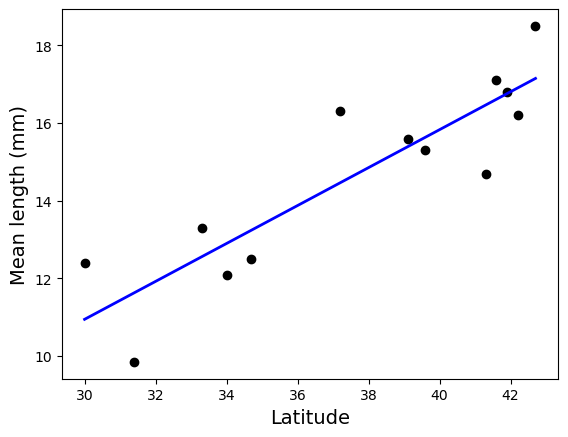

In [6]:
# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Mean length (mm)', fontsize=14)

Text(0, 0.5, 'Mean length (mm)')

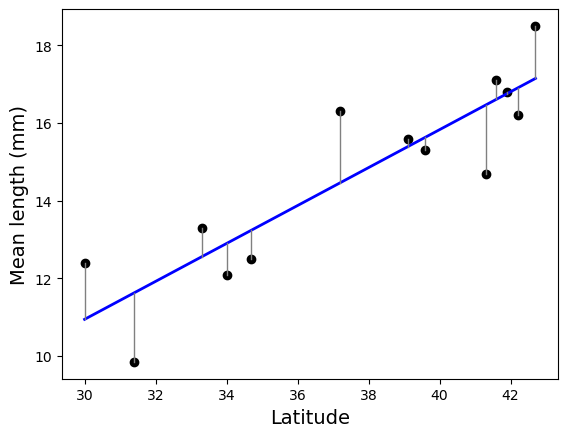

In [7]:
# Graph the residuals
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], yPredicted[i]], color='grey', linewidth=1)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Mean length (mm)', fontsize=14)

### Why not just form a line like this?  What is the problem with a model that looks like this?

Text(0, 0.5, 'Mean length (mm)')

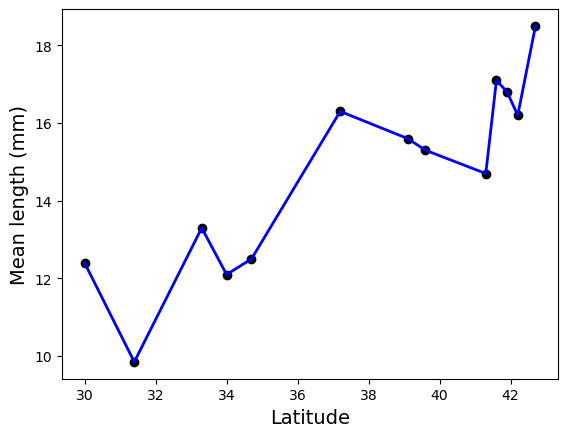

In [8]:
# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, y, color='blue', linewidth=2)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Mean length (mm)', fontsize=14)

In [9]:
# Output the intercept of the least squares regression
intercept = linModel.intercept_
print(intercept[0])

-3.7039348302831687


In [10]:
# Output the slope of the least squares regression
slope = linModel.coef_
print(slope[0][0])

0.4883459157334994


In [11]:
# Write the least squares model as an equation
print("Predicted mean length = ", intercept[0], " + ", slope[0][0], "* (latitude)")

Predicted mean length =  -3.7039348302831687  +  0.4883459157334994 * (latitude)


In [12]:
# Compute the sum of squared errors for the least squares model
SSEreg = sum((y - yPredicted) ** 2)[0]
SSEreg

16.231931026452145

In [13]:
# Compute the sum of squared errors for the horizontal line model
SSEyBar = sum((y - np.mean(y)) ** 2)[0]
SSEyBar

72.94692307692308

In [14]:
# Compute the proportion of variation explained by the linear regression
# using the sum of squared errors
(SSEyBar - SSEreg) / (SSEyBar)

0.7774829925405428

In [15]:
# Compute the correlation coefficient r
r = r_regression(X, np.ravel(y))[0]
r

0.8817499603291902

In [16]:
# Compute the proportion of variation explained by the linear regression
# using correlation coefficient
r**2

0.7774829925405284

In [17]:
# Compute the proportion of variation explained by the linear regression
# using the LinearModel object's score method
linModel.score(X, y)

0.7774829925405428

## Multiple Linear Regression
#se manejan múltiples variables independientes que contribuyen a la variable dependiente


In [2]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits import mplot3d

[mpg.csv](https://drive.google.com/file/d/1-jGj5ReRBXNWoeycGyZlyUX2t5TxuiQd/view?usp=sharing)

In [3]:
# Load the dataset
mpg = pd.read_csv('data/mpg.csv')
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [20]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [44]:
# Remove rows that have missing fields
mpg = mpg.dropna()

# Store relevant columns as variables
#reshape it para que sean 2 columns
X = mpg[['acceleration', 'weight']].values.reshape(-1, 2)
y = mpg[['mpg']].values.reshape(-1, 1)
print("x:",X)
print("y:",y)

x: [[  12.  3504. ]
 [  11.5 3693. ]
 [  11.  3436. ]
 [  12.  3433. ]
 [  10.5 3449. ]
 [  10.  4341. ]
 [   9.  4354. ]
 [   8.5 4312. ]
 [  10.  4425. ]
 [   8.5 3850. ]
 [  10.  3563. ]
 [   8.  3609. ]
 [   9.5 3761. ]
 [  10.  3086. ]
 [  15.  2372. ]
 [  15.5 2833. ]
 [  15.5 2774. ]
 [  16.  2587. ]
 [  14.5 2130. ]
 [  20.5 1835. ]
 [  17.5 2672. ]
 [  14.5 2430. ]
 [  17.5 2375. ]
 [  12.5 2234. ]
 [  15.  2648. ]
 [  14.  4615. ]
 [  15.  4376. ]
 [  13.5 4382. ]
 [  18.5 4732. ]
 [  14.5 2130. ]
 [  15.5 2264. ]
 [  14.  2228. ]
 [  13.  2634. ]
 [  15.5 3439. ]
 [  15.5 3329. ]
 [  15.5 3302. ]
 [  15.5 3288. ]
 [  12.  4209. ]
 [  11.5 4464. ]
 [  13.5 4154. ]
 [  13.  4096. ]
 [  11.5 4955. ]
 [  12.  4746. ]
 [  12.  5140. ]
 [  13.5 2962. ]
 [  19.  2408. ]
 [  15.  3282. ]
 [  14.5 3139. ]
 [  14.  2220. ]
 [  14.  2123. ]
 [  19.5 2074. ]
 [  14.5 2065. ]
 [  19.  1773. ]
 [  18.  1613. ]
 [  19.  1834. ]
 [  20.5 1955. ]
 [  15.5 2278. ]
 [  17.  2126. ]
 [  23.5 22

Text(0, 0.5, 'MPG')

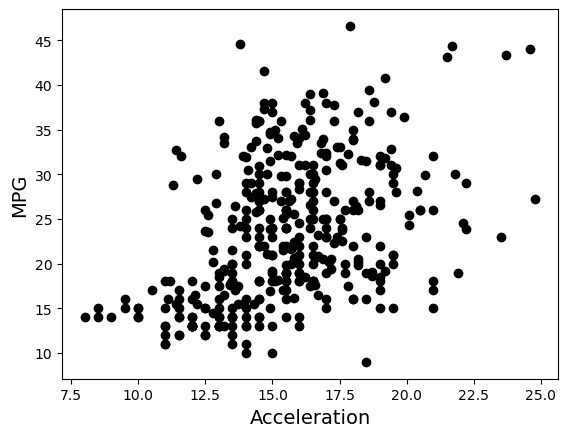

In [22]:
# Graph acceleration vs MPG
plt.scatter(X[:, 0], y, color='black')
plt.xlabel('Acceleration', fontsize=14)
plt.ylabel('MPG', fontsize=14)

Text(0, 0.5, 'MPG')

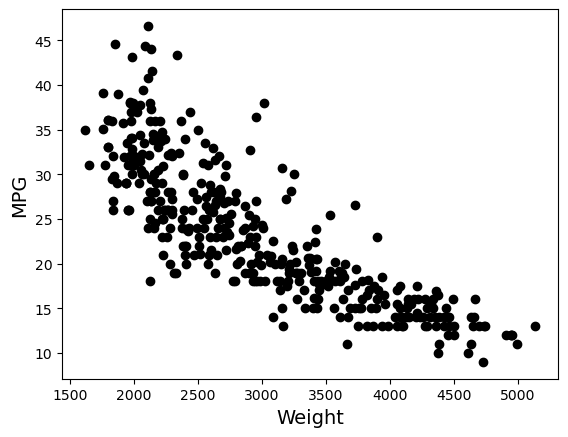

In [23]:
# Graph weight vs MPG
plt.scatter(X[:, 1], y, color='black')
plt.xlabel('Weight', fontsize=14)
plt.ylabel('MPG', fontsize=14)

In [24]:
# Fit a least squares multiple linear regression model
linModel = LinearRegression()
linModel.fit(X, y)

# Write the least squares model as an equation
print(
    #intercept
    "Predicted MPG = ",
    linModel.intercept_[0],
    " + ",
    #coefficnet of acceleration
    linModel.coef_[0][0],
    "* (Acceleration)",
    " + ",
    #coefficient of weight
    linModel.coef_[0][1],
    "* (Weight)",
)

Predicted MPG =  41.09532877960422  +  0.2616503964887878 * (Acceleration)  +  -0.0072930951138257104 * (Weight)


(28.0, 9.0)

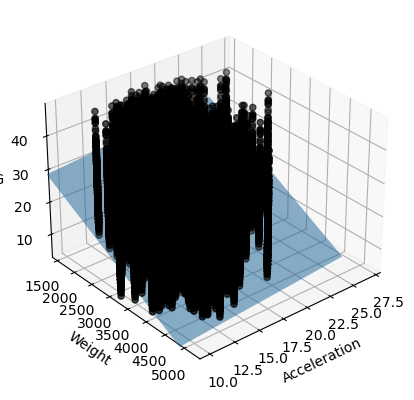

In [25]:
# Set up the figure
fig = plt.figure()
ax = plt.axes(projection='3d')
# Plot the points
ax.scatter3D(X[:, 0], X[:, 1], y, color="Black")
# Plot the regression as a plane
xDeltaAccel, xDeltaWeight = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 2),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 2),
)
yDeltaMPG = (
    linModel.intercept_[0]
    + linModel.coef_[0][0] * xDeltaAccel
    + linModel.coef_[0][1] * xDeltaWeight
)
ax.plot_surface(xDeltaAccel, xDeltaWeight, yDeltaMPG, alpha=0.5)
# Axes labels
ax.set_xlabel('Acceleration')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')
# Set the view angle
ax.view_init(30, 50)
ax.set_xlim(28, 9)

In [26]:
# Compute the proportion of variation explained by the linear regression
# using the LinearModel object's score method
linModel.score(X,y)

0.699697930474305

In [1]:
# Make a prediction
yMultyPredicted = linModel.predict([[20, 1]])
print(
    "Predicted MPG for a car with acceleration = 20 seconds and Weight = 3000 pounds \n",
    "using the multiple linear regression is ",
    yMultyPredicted[0][0],
    "miles per gallon",
)

NameError: name 'linModel' is not defined

## Polynomial Regression

In polynomial regression, the relationship between the dependent variable and the independent variable is modeled as an nth-degree polynomial function. When the polynomial is of degree 2, it is called a quadratic model; when the degree of a polynomial is 3, it is called a cubic model, and so on.

A polynomial regression can be considered using multiple input features. A **polynomial regression** is a mathematical model of input features that includes all powers and interaction terms of the input features up to a fixed degree. An **interaction term** is a term in a regression model that contains multiple input features, such as $ \mathbf{(x_1^3x_2)} $. Interaction terms are included to reflect how the prediction changes in non-additive ways as the features vary. The degree of an interaction term is the sum of the powers on the term. Ex: $ \mathbf{(x_1^3x_2)} $ is a degree 4 interaction term. Interactive terms can account for dependency between input features.

The general equation of a multiple polynomial equation is cumbersome to write but can be easily displayed for a small degree. Ex: A degree 2 (quadratic) polynomial regression on two input features has the form $ \mathbf{\hat{y}\ =\ b_0\ +\ b_1x_1\ +\ b_2x_2\ +\ b_3x_1^2\ +\ b_4x_1x_2\ +\ b_5x_2^2} $.

Like simple polynomial regression, the function used for the regression is not linear, but the regression is said to be linear with respect to the powers and interaction terms.
Suppose we have a dataset where variable X represents the Independent data and Y is the dependent data. Before feeding data to a model in the preprocessing stage, we convert the input variables into polynomial terms using some degree.

Consider an example my input value is 35, and the degree of a polynomial is 2, so I will find 35 power 0, 35 power 1, and 35 power 2 this helps to interpret the non-linear relationship in data.
The equation of polynomials becomes something like this.

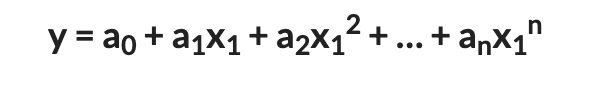

The degree of order to use is a Hyperparameter, and we need to choose it wisely. Using a high degree of polynomial tries to overfit the data. For smaller values of degree, the model tries to underfit, so we need to find the optimum value of a degree. Polynomial Regression models are usually fitted with the method of least squares.

Source: [analyticsvidhya.com](https://www.analyticsvidhya.com/blog/2021/07/all-you-need-to-know-about-polynomial-regression/#:~:text=A%20polynomial%20regression%20model%20is,the%20complexity%20of%20the%20relationship.)

Predicted MPG =  62.25547397329207  +  -0.018495610572078953 * (Weight)  +  1.6965650653725291e-06 * (Weight)^2


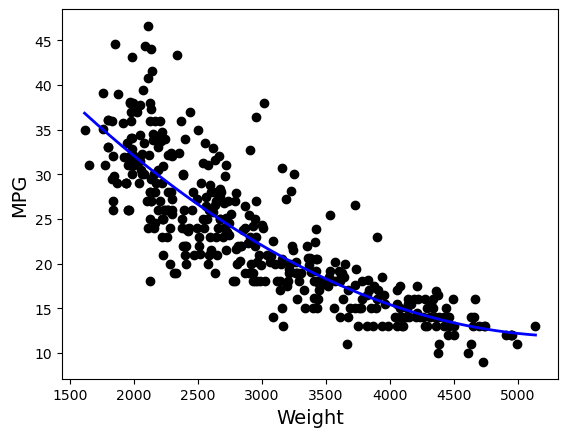

In [28]:
# Store weight as an array
#x2 all the rows butj just column 1, not 0
X2 = X[:, 1].reshape(-1, 1)

# Fit a quadratic regression model using just Weight
#features of degree 2
polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X2)
polyModel = LinearRegression()
polyModel.fit(xPoly, y)

# Graph the quadratic regression
plt.scatter(X2, y, color='black')
xDelta = np.linspace(X2.min(), X2.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Weight', fontsize=14)
plt.ylabel('MPG', fontsize=14)

# Write the quadratic model as an equation
print(
    "Predicted MPG = ",
    polyModel.intercept_[0],
    " + ",
    polyModel.coef_[0][0],
    "* (Weight)",
    " + ",
    polyModel.coef_[0][1],
    "* (Weight)^2",
)

In [29]:
# Make a prediction
polyInputs = polyFeatures.fit_transform([[3000]])
yPolyPredicted = polyModel.predict(polyInputs)
print(
    "Predicted MPG for a car with Weight = 3000 pounds \n",
    "using the simple polynomial regression is ", yPolyPredicted[0][0], "miles per gallon",
)

Predicted MPG for a car with Weight = 3000 pounds 
 using the simple polynomial regression is  22.03772784540797 miles per gallon


In [30]:
# Fit a quadratic regression model using acceleration and weight
polyFeatures2 = PolynomialFeatures(degree=2, include_bias=False)
xPoly2 = polyFeatures.fit_transform(X)
polyModel2 = LinearRegression()
polyModel2.fit(xPoly2, y)

# Write the quadratic regression as an equation
print(
    "Predicted MPG =", polyModel2.intercept_[0], "\n",
    " + ", polyModel2.coef_[0][0], "* (Acceleration)\n",
    " + ", polyModel2.coef_[0][1], "* (Weight)", "\n",
    " + ", polyModel2.coef_[0][2], "* (Acceleration)^2 \n",
    " + ", polyModel2.coef_[0][3], "* (Acceleration)*(Weight) \n",
    " + ", polyModel2.coef_[0][4], "* (Weight)^2 \n",
)

Predicted MPG = 78.31768655372295 
  +  -1.6282643136374915 * (Acceleration)
  +  -0.022634642648925993 * (Weight) 
  +  0.045613892468764294 * (Acceleration)^2 
  +  0.00015544962680995964 * (Acceleration)*(Weight) 
  +  2.0264199567111614e-06 * (Weight)^2 



In [31]:
# Make a prediction
polyInputs2 = polyFeatures2.fit_transform([[20, 3000]])
yPolyPredicted2 = polyModel2.predict(polyInputs2)
print(
    "Predicted MPG for a car with acceleration = 20 seconds and Weight = 3000 pounds \n",
    "using the polynomial regression is ", yPolyPredicted2[0][0], "miles per gallon",
)

Predicted MPG for a car with acceleration = 20 seconds and Weight = 3000 pounds 
 using the polynomial regression is  23.658786540698884 miles per gallon


In [32]:
# Compute the proportion of variation explained by the linear regression
# using the LinearRegression object's score method
polyModel2.score(xPoly2,y)

0.7286472621668061

In [33]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
# X_poly now contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this extended training data
X_poly

array([[-7.52759287e-01,  5.66646544e-01],
       [ 2.70428584e+00,  7.31316190e+00],
       [ 1.39196365e+00,  1.93756281e+00],
       [ 5.91950905e-01,  3.50405874e-01],
       [-2.06388816e+00,  4.25963433e+00],
       [-2.06403288e+00,  4.26023172e+00],
       [-2.65149833e+00,  7.03044338e+00],
       [ 2.19705687e+00,  4.82705891e+00],
       [ 6.06690070e-01,  3.68072842e-01],
       [ 1.24843547e+00,  1.55859111e+00],
       [-2.87649303e+00,  8.27421218e+00],
       [ 2.81945911e+00,  7.94934969e+00],
       [ 1.99465584e+00,  3.97865194e+00],
       [-1.72596534e+00,  2.97895634e+00],
       [-1.90905020e+00,  3.64447265e+00],
       [-1.89957294e+00,  3.60837736e+00],
       [-1.17454654e+00,  1.37955958e+00],
       [ 1.48538590e-01,  2.20637127e-02],
       [-4.08329888e-01,  1.66733298e-01],
       [-1.25262516e+00,  1.56906979e+00],
       [ 6.71117368e-01,  4.50398522e-01],
       [-2.16303684e+00,  4.67872835e+00],
       [-1.24713211e+00,  1.55533850e+00],
       [-8.

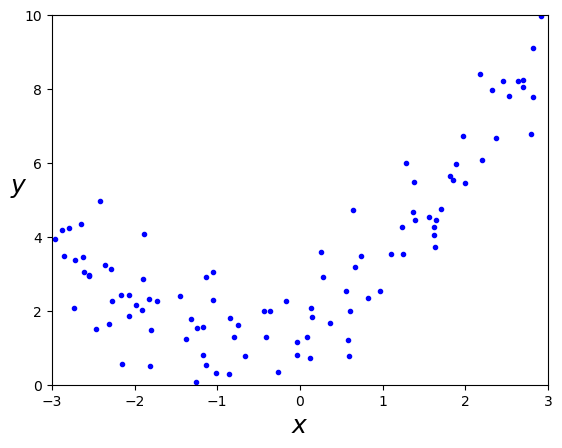

In [35]:
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_poly, y)
lr.intercept_, lr.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

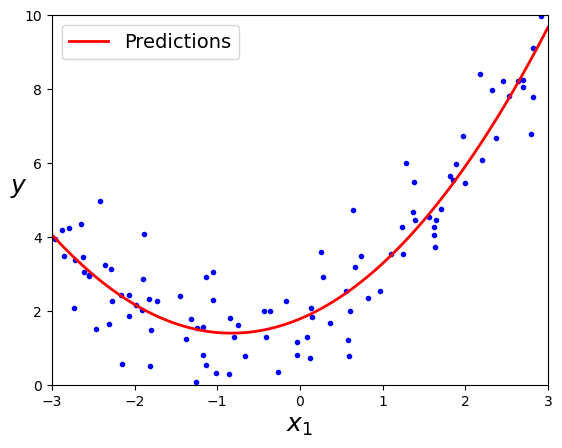

In [37]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

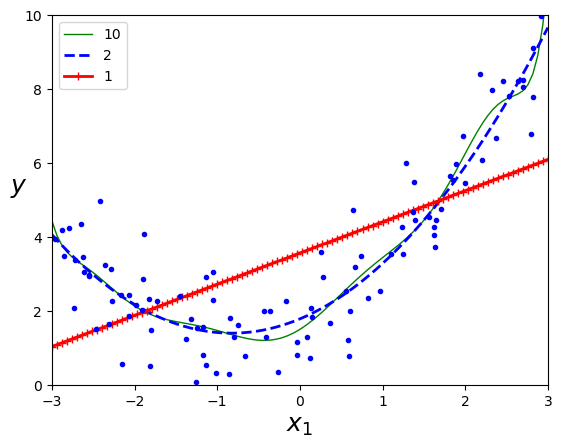

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 10), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    #Pipeline
    polynomial_regression = Pipeline([("poly_features", polybig_features),("std_scaler", std_scaler),("lin_reg", lin_reg),])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()
